Automatically created module for IPython interactive environment
[   [0, 8684, 1056, 4791, 5160, 5045, 1467, 4849, 4338, 8077],
    [8684, 0, 8890, 9701, 9877, 8493, 8583, 9982, 10281, 6001],
    [1056, 8890, 0, 4304, 4602, 5731, 2201, 4295, 3813, 7415],
    [4791, 9701, 4304, 0, 513, 6054, 5715, 261, 508, 4030],
    [5160, 9877, 4602, 513, 0, 5558, 5883, 263, 796, 4025],
    [5045, 8493, 5731, 6054, 5558, 0, 4321, 5782, 5759, 8766],
    [1467, 8583, 2201, 5715, 5883, 4321, 0, 6000, 5513, 9640],
    [4849, 9982, 4295, 261, 263, 5782, 6000, 0, 515.8611, 4015.33],
    [4338, 10281, 3813, 508, 796, 5759, 5513, 515.8611, 0, 4223.4046],
    [8077, 6001, 7415, 4030, 4025, 8766, 9640, 4015.33, 4223.4046, 0]]
array([[  8.73510894e+02,   3.15775257e+03],
       [  4.83371244e+03,  -5.83501623e+03],
       [ -3.56776644e+00,   3.06314410e+03],
       [ -2.41871783e+03,  -1.09766330e+02],
       [ -2.43340793e+03,  -4.04638988e+02],
       [  3.98211765e+03,   7.52149007e+02],
       [  2.1225912

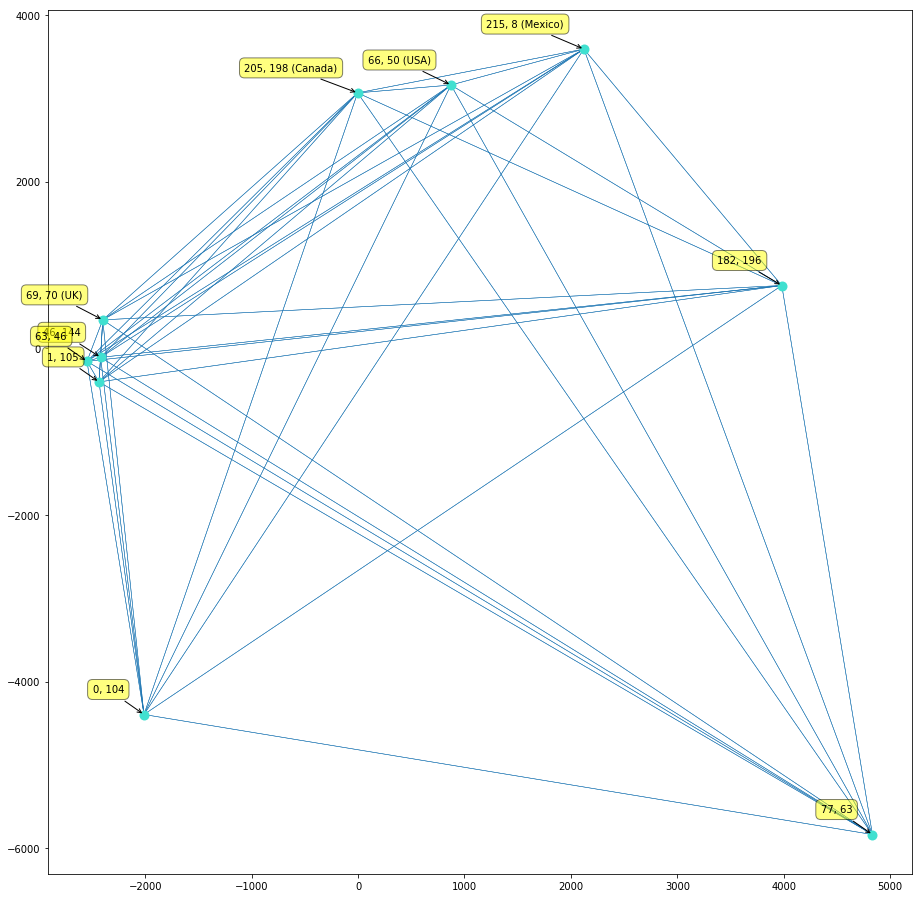

In [40]:
print(__doc__)
%clear
import numpy as np
import pprint

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

pp = pprint.PrettyPrinter(indent=4)

n_samples = 10
similarities = [[0,8684,1056,4791,5160,5045,1467,4849,4338,8077],\
                [8312,0,8890,9701,9877,8493,8583,9982,10281,6001],\
                [1197,9069,0,4304,4602,5731,2201,4295,3813,7415],\
                [4884,9785,4331,0,513,6054,5715,261,508,4030],\
                [4992,9705,4414,515,0,5558,5883,263,796,4025],\
                [4975,8448,5803,6107,5760,0,4321,5782,5759,8766],\
                [1389,8220,2303,6027,6304,4683,0,6000,5513,9640],\
                [4915.8843096045,10153.89,4280.06087,284.518,266.55566,5696.55,5887.79,0,515.8611,4015.33],\
                [4301.760,10438.14,3857.474,452.9038,874.10,5825.9,4956.,100.31,0,4223.4046],\
                [8164.80,6013.,7653.0,4046.8,3920.2,8573.0,9730.1,4086.05,4485.245361538,0]]
labels = ['66, 50 (USA)','77, 63','205, 198 (Canada)','46, 144','1, 105','182, 196','215, 8 (Mexico)','63, 46','69, 70 (UK)','0, 104']

for x in range (0, n_samples):
    for y in range (0, n_samples):
        if x == y:
            break;
        similarities[x][y] = similarities[y][x]
        
pp.pprint(similarities)

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_
pp.pprint(pos)

# Rescale the data
#pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())

# Rotate the data
#clf = PCA(n_components=2)
#pos = clf.fit_transform(pos)

fig = plt.figure(1, figsize=(12, 12))

ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')

for label, x, y in zip(labels, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
8,6

#similarities = similarities.max() / similarities * 100

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[pos[i, :], pos[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
#lc.set_array(similarities)
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()